# Preferential Attachment

Graphs formed by random preferential attachment will exhibit hub nodes that have significantly more connections that other nodes.

In these graphs the degree distribution forms a power law.

Such graphs can be formed by biasing the probability of choosing a given edge target by the degree of that target.

Construct a graph that starts from a set of unconnected vertices and that (instead of the uniform random selection in the previous exercise) preferentially selects two vertices and connects them.

Observe how the number of edges needed to form a connected component changes with respect to the previous exercise. Check the degree distribution of the resulting graph once a single connected component is established.

In [2]:
import networkx as nx
import numpy as np
import random
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def graphing2(num_nodes):
    # Creates a graph
    graph = nx.Graph()

    # Adds nodes to graph
    for i in range(num_nodes):
        graph.add_node(i)

    # Adds edges by node degrees until graph is fully connected
    while not nx.is_connected(graph):
        possible_edges = list(nx.non_edges(graph))
        nodes_degrees = sum([graph.degree[x] for x in range(graph.number_of_nodes())])

        if nodes_degrees < 1:
            edge = random.choice(possible_edges)
        else:
            probabilities = [graph.degree[x] for (x, y) in possible_edges]
            if sum(probabilities) == 0.0:
                edge = random.choice(possible_edges)
            else:
                probabilities = [x / sum(probabilities) for x in probabilities]
                edge = possible_edges[np.random.choice(len(possible_edges), p=probabilities)]

        graph.add_edge(edge[0], edge[1])

    return graph

NODES: 1 - EDGES: 0.00
NODES: 2 - EDGES: 1.00
NODES: 3 - EDGES: 2.00
NODES: 4 - EDGES: 3.52
NODES: 5 - EDGES: 6.22
NODES: 6 - EDGES: 8.90
NODES: 7 - EDGES: 13.82
NODES: 8 - EDGES: 18.16
NODES: 9 - EDGES: 25.12
NODES: 10 - EDGES: 32.00
NODES: 11 - EDGES: 37.92
NODES: 12 - EDGES: 50.18
NODES: 13 - EDGES: 54.04
NODES: 14 - EDGES: 70.14
NODES: 15 - EDGES: 82.48
NODES: 16 - EDGES: 84.56
NODES: 17 - EDGES: 103.54
NODES: 18 - EDGES: 113.88
NODES: 19 - EDGES: 128.60
NODES: 20 - EDGES: 155.36
NODES: 21 - EDGES: 161.78
NODES: 22 - EDGES: 181.16
NODES: 23 - EDGES: 204.32
NODES: 24 - EDGES: 217.46
NODES: 25 - EDGES: 249.02
NODES: 26 - EDGES: 266.04
NODES: 27 - EDGES: 291.82
NODES: 28 - EDGES: 331.44
NODES: 29 - EDGES: 348.66
NODES: 30 - EDGES: 369.96


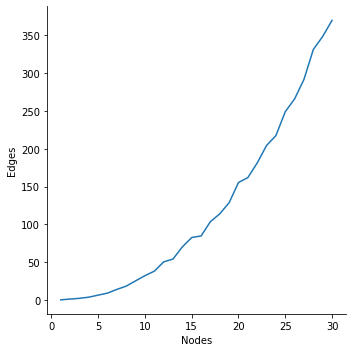

In [77]:
# For growing numbers of initial vertices how many edges had to be added.

nodes = [n for n in range(1, 31)]
samples = 50
edges = []

for n in nodes:
    total_edges = 0.0
    for i in range(samples):
        total_edges += graphing2(n).number_of_edges()
    edges.append(total_edges/samples)
    print("NODES: %d - EDGES: %.2f" % (n, edges[-1]))

df = pd.DataFrame()
df['Nodes'] = nodes
df['Edges'] = edges

sns.relplot(
    data=df, x="Nodes", y="Edges", kind="line"
)

NODES: 50
EDGES: 1177


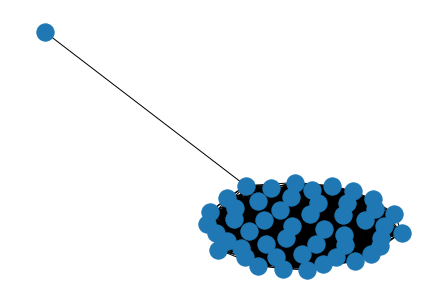

In [78]:
num_nodes = 50
graph = graphing2(num_nodes)
nx.draw(graph)
print("NODES: %d\nEDGES: %d" % (num_nodes, graph.number_of_edges()))

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 49.]),
 array([ 1. ,  5.8, 10.6, 15.4, 20.2, 25. , 29.8, 34.6, 39.4, 44.2, 49. ]),
 <BarContainer object of 10 artists>)

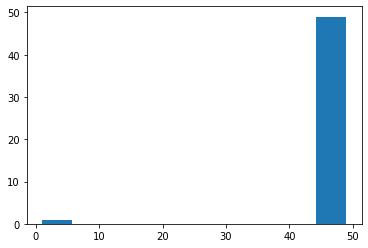

In [79]:
data = [graph.degree[x] for x in range(graph.number_of_nodes())]
plt.hist(data)

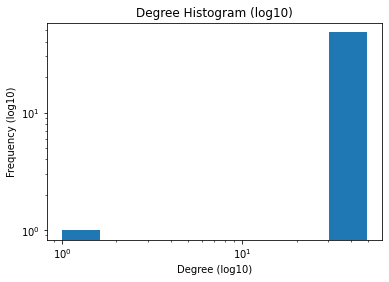

In [80]:
hist, bins, _ = plt.hist(data, bins=8)
plt.cla()
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(data, bins=logbins)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Frequency (log10)')
plt.xlabel('Degree (log10)')
plt.title('Degree Histogram (log10)')
plt.show()

Construct a graph that starts with a single node and that gradually adds vertices while connecting each new vertice to an existing vertice that is chosen under preferential attachment.

Check the degree distribution of the resulting graph, to confirm the occurrence of a power law.

In [81]:
def graphing3(num_nodes):
    # Creates a graph
    graph = nx.Graph()

    # Adds the first vertice (node)
    graph.add_node(0)
    
    # Connects each new vertice (node) to an existing vertice that is chosen under preferential attachment
    for i in range(1, num_nodes):
        possible_edges = range(graph.number_of_nodes())
        
        probabilities = [graph.degree[x] for x in possible_edges]
        if sum(probabilities) == 0.0:
            edge = random.choice(possible_edges)
        else:
            probabilities = [x / sum(probabilities) for x in probabilities]
            edge = possible_edges[np.random.choice(len(possible_edges), p=probabilities)]
            
        graph.add_node(i)
        graph.add_edge(edge, i)
    
    return graph   

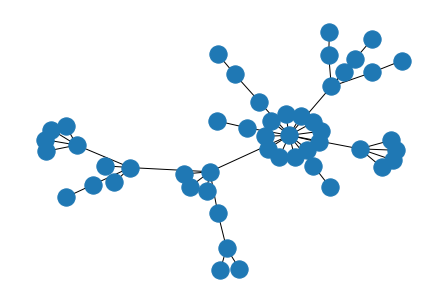

In [74]:
num_nodes = 50
graph = graphing3(num_nodes)
nx.draw(graph)

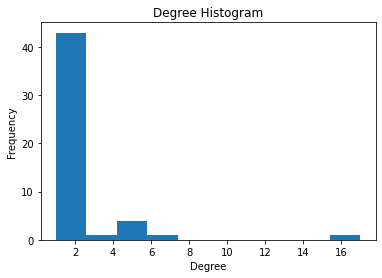

In [75]:
data = [graph.degree[x] for x in range(graph.number_of_nodes())]
plt.title('Degree Histogram')
plt.ylabel('Frequency')
plt.xlabel('Degree')
plt.hist(data)
plt.show()

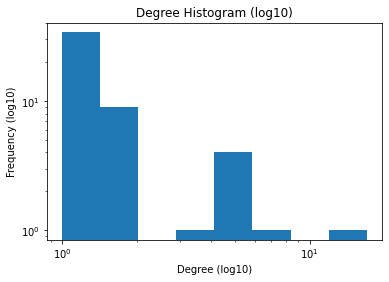

In [76]:
hist, bins, _ = plt.hist(data, bins=8)
plt.cla()
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(data, bins=logbins)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Frequency (log10)')
plt.xlabel('Degree (log10)')
plt.title('Degree Histogram (log10)')
plt.show()